In [ ]:
# Cargar archivos de Drive

# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Almacenamos la ruta de los archivos en una variable
# ruta='/content/drive/MyDrive/Colab Notebooks/Módulo 1 - Extracción de datos de diferentes fuentes/'
ruta = ''

# Archivos de texto
### De texto a `DataFrame`

In [2]:
import pandas as pd

In [3]:
# Extracción a partir de texto separado por tabular
pd.read_fwf(ruta+'texto_2.txt', header=None)

,0,1,2
0,Ana,1.0,10
1,Beto,1.1,10
2,Alfredo,6.0,9
3,Armando,5.0,9


In [4]:
pd.read_table(ruta+'texto_2.txt', header=None)

,0,1,2
0,Ana,1.0,10
1,Beto,1.1,10
2,Alfredo,6.0,9
3,Armando,5.0,9


In [5]:
pd.read_csv(ruta+'texto_2.txt', header=None, sep='\t')

,0,1,2
0,Ana,1.0,10
1,Beto,1.1,10
2,Alfredo,6.0,9
3,Armando,5.0,9


In [6]:
# Extracción a partir de texto separado por comas, con read_table necesitas ,
pd.read_table(ruta+'texto_1.txt',sep=',',header=None)

,0,1,2
0,Ana,1.0,10
1,Beto,1.1,10
2,Alfredo,6.0,9
3,Armando,5.0,9


In [7]:
pd.read_csv(ruta+'texto_1.txt',header=None)

,0,1,2
0,Ana,1.0,10
1,Beto,1.1,10
2,Alfredo,6.0,9
3,Armando,5.0,9


### Expresiones regulares

In [ ]:
# Conversión de archivo a variable
file=open(ruta+'texto_3.txt')     # Abrir...
texto=file.read()
file.close()                      # ...despues cerrar

In [ ]:
# Si ocurre un error durante la ejecución, la variable file se cierra siempre:
with open(ruta+'texto_3.txt') as file:
  texto=file.read()

In [ ]:
texto

'En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocón flaco y galgo corredor. Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lantejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. El resto della concluían sayo de velarte, calzas de velludo para las fiestas, con sus pantuflos de lo mesmo, y los días de entresemana se honraba con su vellorí de lo más fino. Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta años; era de complexión recia, seco de carnes, enjuto de rostro, gran madrugador y amigo de la caza. Quieren decir que tenía el sobrenombre de Quijada, o Quesada, que en esto hay alguna diferencia en los autores 

In [ ]:
# Separamos cada palabra de la variable de texto
texto.split()

In [ ]:
# Conteo de palabras. Expresiones regulares
import re

In [ ]:
# \w -> [a-z][A-Z][0-9][_]
# \W -> ^[\w]
# \d -> [0-9]
# \D -> ^[0-9]
# \s -> [\t\n \r]
#caracteres no alfanuméricos
L=re.split('\W', texto) 
# Eliminar elementos reptidos
S=set(L)
S.discard('')
S

{'El',
 'En',
 'Frisaba',
 'Mancha',
 'Pero',
 'Quesada',
 'Quieren',
 'Quijada',
 'Quijana',
 'Tenía',
 'Una',
 'a',
 'acordarme',
 'adarga',
 'algo',
 'alguna',
 'algún',
 'ama',
 'amigo',
 'antigua',
 'astillero',
 'así',
 'aunque',
 'autores',
 'añadidura',
 'años',
 'basta',
 'calzas',
 'campo',
 'carnero',
 'carnes',
 'casa',
 'caso',
 'caza',
 'cincuenta',
 'como',
 'complexión',
 'con',
 'concluían',
 'conjeturas',
 'consumían',
 'corredor',
 'cuarenta',
 'cuento',
 'cuyo',
 'de',
 'decir',
 'deja',
 'della',
 'deste',
 'diferencia',
 'domingos',
 'duelos',
 'dél',
 'días',
 'edad',
 'el',
 'en',
 'enjuto',
 'ensillaba',
 'entender',
 'entresemana',
 'era',
 'escriben',
 'esto',
 'fiestas',
 'fino',
 'flaco',
 'galgo',
 'gran',
 'ha',
 'hacienda',
 'hay',
 'hidalgo',
 'honraba',
 'importa',
 'la',
 'lantejas',
 'lanza',
 'las',
 'llamaba',
 'llegaba',
 'lo',
 'los',
 'lugar',
 'madrugador',
 'mesmo',
 'mozo',
 'mucho',
 'más',
 'narración',
 'no',
 'noches',
 'nombre',
 'nuestr

In [ ]:
# lista de palabras que cumplan expresión regular. E o e concatenada con n
res1=re.findall('[Ee]n',texto)
# contar apariciones
len(res1)

21

In [ ]:
# lista de palabras que cumplan expresión regular. E o e concatenada con n, ignorando mayúsculas o minúsculas
res1=re.findall('en',texto,flags=re.I)
# contar apariciones
len(res1)

21

In [ ]:
# Buscamos las palabras no repetidas del set en la variable de texto para poderlas contar
d = {}
for palabra in S:
  d[palabra] = len(re.findall(palabra,texto,flags=re.I))
df = pd.DataFrame(d.items())
  

,0,1
0,resto,1
1,casa,1
2,tenía,2
3,mucho,1
4,viernes,1
...,...,...
136,duelos,1
137,partes,1
138,fiestas,1
139,tres,2


# Archivos excel

In [ ]:
# A partir de la función
pd.read_excel(ruta+'API_SI.POV.DDAY_DS2_en_excel_v2_1930012.xls')

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,Last Updated Date,2020-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
3,Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Kosovo,XKX,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,1.7,0.6,0.3,1.0,0.7,0.8,0.4,NaN,NaN,NaN
263,"Yemen, Rep.",YEM,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.3,NaN,NaN,NaN,NaN,NaN,NaN
264,South Africa,ZAF,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.7,NaN,NaN,NaN,NaN,NaN,NaN
265,Zambia,ZMB,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,58.7,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Importamos la clase ExcelFile
from pandas import ExcelFile

In [ ]:
# A partir de la clase
obj=ExcelFile(ruta+'API_SI.POV.DDAY_DS2_en_excel_v2_1930012.xls')
obj.parse()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,Last Updated Date,2020-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
3,Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Kosovo,XKX,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,1.7,0.6,0.3,1.0,0.7,0.8,0.4,NaN,NaN,NaN
263,"Yemen, Rep.",YEM,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.3,NaN,NaN,NaN,NaN,NaN,NaN
264,South Africa,ZAF,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.7,NaN,NaN,NaN,NaN,NaN,NaN
265,Zambia,ZMB,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,58.7,NaN,NaN,NaN,NaN,NaN


# Archivos JSON

In [ ]:
pd.read_json?

In [ ]:
pd.read_json(ruta+'data.json',orient='split')

,_id,categories,isActive,imageUrl,barcode,isFmcg,itemName,mrp,_created_at,_updated_at
0,OzE5vaa3p7,"[{'__type': 'Pointer', 'className': 'Category'...",True,https://firebasestorage.googleapis.com/v0/b/sh...,8908001921015,True,Anil puttu flour 500g,58,2016-10-02 13:49:03.281000+00:00,2017-02-22 08:48:09.548000+00:00
1,ENPCL8ph1p,"[{'__type': 'Pointer', 'className': 'Category'...",True,https://firebasestorage.googleapis.com/v0/b/ki...,8901725181222,True,"Yippee Magic Masala Noodles, 70 G",12,2016-10-02 13:49:03.284000+00:00,2017-02-22 08:48:09.074000+00:00


In [ ]:
# _ es lo que tiene en memoria al final, lo último ejecutado. Accedemos al diccionario en la key categories
_['categories'][0]

[{'__type': 'Pointer', 'className': 'Category', 'objectId': 'nebCwWd2Fr'}]

# Archivos XML

In [ ]:
import xml.etree.ElementTree as ET

In [ ]:
archivo=ET.parse(ruta+'tabla_1.xml')
#Extraer estructura
raiz=archivo.getroot()

In [ ]:
for nodo in raiz:
  print("=====================Nodo=================================")
  print(f"tag: {nodo.tag},attrib: {nodo.attrib['name']},text: {nodo.text}")
  print("=====================Sub nodos=================================")
  for subnodo in nodo:
    print(f"tag: {subnodo.tag},attrib: {subnodo.attrib},text: {subnodo.text}")

=====================Nodo=================================
tag: country,attrib: Liechtenstein,text: 
        
=====================Sub nodos=================================
tag: rank,attrib: {},text: 1
tag: year,attrib: {},text: 2008
tag: gdppc,attrib: {},text: 141100
=====================Nodo=================================
tag: country,attrib: Singapore,text: 
        
=====================Sub nodos=================================
tag: rank,attrib: {},text: 4
tag: year,attrib: {},text: 2011
tag: gdppc,attrib: {},text: 59900
=====================Nodo=================================
tag: country,attrib: Panama,text: 
        
=====================Sub nodos=================================
tag: rank,attrib: {},text: 68
tag: year,attrib: {},text: 2011
tag: gdppc,attrib: {},text: 13600


In [ ]:
data = []
for nodo in raiz:
  country_data = {}
  country_data[nodo.tag] = nodo.attrib['name']
  for subnodo in nodo:
    country_data[subnodo.tag] = subnodo.text
  data.append(country_data)

  df = pd.DataFrame(data)
  print(df)

         country rank  year   gdppc
0  Liechtenstein    1  2008  141100
         country rank  year   gdppc
0  Liechtenstein    1  2008  141100
1      Singapore    4  2011   59900
         country rank  year   gdppc
0  Liechtenstein    1  2008  141100
1      Singapore    4  2011   59900
2         Panama   68  2011   13600


In [ ]:
tabla_2 = ET.parse(ruta+'tabla_2.xml')
#Extraer estructura
raiz=tabla_2 =tabla_2.getroot()
print(raiz)

<Element 'author' at 0x7fc821f4b450>


In [ ]:
for nodo in raiz:
  print(nodo.tag)
  for subnodo in nodo:
    print(f"tag: {subnodo.tag},attrib: {subnodo.attrib},text: {subnodo.text}")

documents
tag: document,attrib: {'KEY': 'e95a9a6c790ecb95e46cf15bee517651', 'web': 'www.ubm/doc004.com'},text: Nevertheless, high and based on experience, fluctuating throughput levels contradict high reliability.

        
tag: document,attrib: {'KEY': 'bc360cfbafc39970587547215162f0db', 'web': 'www.ubm/doc006.com'},text: As long as the production is not conducted on the basis of concrete customer orders, the companies objectives

        
tag: document,attrib: {'KEY': '19e71144c50a8b9160b3f0955e906fce', 'web': 'www.ubm/doc005.com'},text: Many companies today, in different fields of operations and sizes, have access to a vast amount of data which was not available only a couple of years ago.

        
tag: document,attrib: {'KEY': '21d4af9021a174f61b884606c74d9e42', 'web': 'www.ubm/doc002.com'},text: A famous example of a successful prediction is by the German astronomer Johann Gottfried Galle

        
tag: document,attrib: {'KEY': '28a45eb2460899763d709ca00ddbb665', 'web': 'www.ubm/

In [ ]:
d_list = []
for nodo in raiz:
  for subnodo in nodo:
    d = {subnodo.tag:subnodo.text}
    for k in subnodo.attrib: # subnodo.attrib.keys() # subnodo.attrib.items() -> Regresa key y value
      d[k]=subnodo.attrib[k]
    d_list.append(d)
print(pd.DataFrame(d_list))


                                            document  \
0  Nevertheless, high and based on experience, fl...   
1  As long as the production is not conducted on ...   
2  Many companies today, in different fields of o...   
3  A famous example of a successful prediction is...   
4  A more recent example of the same kind is the ...   

                                KEY                 web  
0  e95a9a6c790ecb95e46cf15bee517651  www.ubm/doc004.com  
1  bc360cfbafc39970587547215162f0db  www.ubm/doc006.com  
2  19e71144c50a8b9160b3f0955e906fce  www.ubm/doc005.com  
3  21d4af9021a174f61b884606c74d9e42  www.ubm/doc002.com  
4  28a45eb2460899763d709ca00ddbb665  www.ubm/doc001.com  


---

In [ ]:
archivo='IFC-Subscriptions-and-Voting-Power-of-Member-Count.xml'
file=ET.parse(ruta+archivo)
root=file.getroot()

{}


In [ ]:
sub_1 = 1
for nodo in root:
  print(f"======subnodo {sub_1}======")
  sub_2 = 1
  for subnodo_1 in nodo:
    print(f"tag: {subnodo_1.tag},attrib: {subnodo_1.attrib},text: {subnodo_1.text}")
    print(f"======subnodo {sub_1}.{sub_2}======")
    sub_2+=1
    for subnodo_2 in subnodo_1:
      print(f"tag: {subnodo_2.tag},attrib: {subnodo_2.attrib},text: {subnodo_2.text}")
  sub_1+=1

======subnodo 1======
tag: row,attrib: {'_id': 'row-y44j~at3a-b2ir', '_uuid': '00000000-0000-0000-0100-063657E78388', '_position': '0', '_address': 'https://finances.worldbank.org/resource/gsdw-avpz/row-y44j~at3a-b2ir'},text: 

======subnodo 1.1======
tag: member,attrib: {},text: Afghanistan
tag: amount_thousands_of_usd,attrib: {},text: 1727
tag: percent_of_total_amount,attrib: {},text: 0.01
tag: number_of_votes,attrib: {},text: 8326
tag: percent_of_total_votes,attrib: {},text: 0.04
tag: as_of_date,attrib: {},text: 2021-08-06T00:00:00
tag: row,attrib: {'_id': 'row-cgqt~xxg3~xehh', '_uuid': '00000000-0000-0000-028B-9164C4785E6F', '_position': '0', '_address': 'https://finances.worldbank.org/resource/gsdw-avpz/row-cgqt~xxg3~xehh'},text: 

======subnodo 1.2======
tag: member,attrib: {},text: Albania
tag: amount_thousands_of_usd,attrib: {},text: 9927
tag: percent_of_total_amount,attrib: {},text: 0.05
tag: number_of_votes,attrib: {},text: 16526
tag: percent_of_total_votes,attrib: {},text: 0

---

# Archivos SHP

In [ ]:
# %conda !pip !conda
%pip install geopandas

In [ ]:
import geopandas as gpd

In [ ]:
rutaCOVID='/content/drive/MyDrive/Colab Notebooks/Módulo 1 - Extracción de datos de diferentes fuentes/COVID_INDIA_POC-shp/'
gpd.read_file(rutaCOVID+'COVID_INDIA_POC.shp')

,OBJECTID,RecordID2,Address,State_UT,District,GC_LAT,GC_LON,geometry
0,1,163,"No. 09, Samiyam Road, Thafasenthirpuram, Aniks...",Tamil Nadu,CHENNAI,11.312304,79.709747,POINT (79.70975 11.31230)
1,2,977,noor imaging center almedia bldg junction of s...,MAHARASHTRA,MUMBAI,19.144093,72.842525,POINT (72.84253 19.14409)
2,3,1143,"D/o Elumalai, Kila Street, Ariyalur, (Local Ad...",Tamil Nadu,Ariyalur,11.140059,79.078628,POINT (79.07863 11.14006)
3,4,965,"C-403, Padmraj Residency, Opp. Kedar Society, ...",Maharashtra,THANE,19.157694,73.077513,POINT (73.07751 19.15769)
4,5,318,B-993 FIRST FLOOR BACK SIDE NEAR NHPC CHOWK GR...,HARYANA,FARIDABAD,28.471226,77.288265,POINT (77.28827 28.47123)
...,...,...,...,...,...,...,...,...
507,508,1192,GAJULARAMARAM MEDCHAL,Telangana,MEDCHAL MALKAJGIRI,17.561118,78.492872,POINT (78.49287 17.56112)
508,509,1200,"SULTANPURA ,HYDERABAD",Telangana,HYDERABAD,17.375189,78.487542,POINT (78.48754 17.37519)
509,510,1202,"SULTHANPURA,HYDERABAD",Telangana,HYDERABAD,17.555122,78.308114,POINT (78.30811 17.55512)
510,511,1236,KISHAN BAGH HYDERABAD,TELANGANA,HYDERABAD,17.355327,78.443261,POINT (78.44326 17.35533)


# Archivos imágen

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
I=plt.imread(ruta+'imagen.bmp')
I.shape

(199, 309, 4)

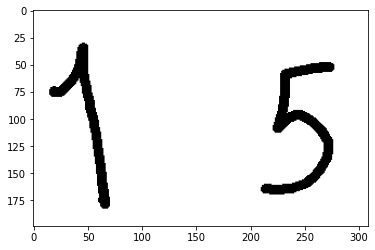

In [ ]:
plt.imshow(I)

In [ ]:
I[0,0,3] # Pixel (x,y) matríz 3. R, G, B (3)

255

In [ ]:
c=0.5*np.ones((199,309,4))

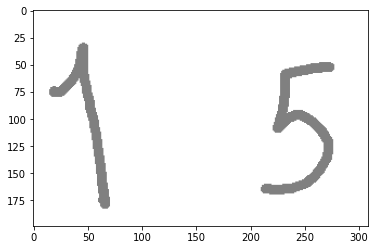

In [ ]:
c[:,:,:3]=I[:,:,:3]/255
plt.imshow(c)

In [ ]:
c[0,0,0]

1.0

In [ ]:
# Obtención de una matríz en escala de grises
G=I.mean(axis=2)
G.shape

(199, 309)

In [ ]:
G=G/255
G[0,0]

1.0

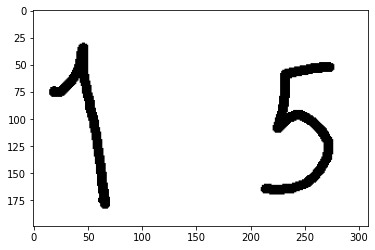

In [ ]:
plt.imshow(G, cmap='gray')

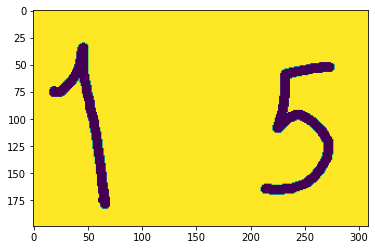

In [ ]:
plt.imshow(G)